# IMPORT LIBRARIES

In [51]:
# !pip install Minio
# !pip install delta-spark

In [52]:
from minio import Minio
from minio.error import S3Error
import pandas as pd
import matplotlib.pyplot as plt

# LOAD BUCKET

In [53]:
# Initialize MinIO client
client = Minio('localhost:9000',
                     access_key='minioadmin',
                     secret_key='minioadmin',
                     secure=False)  # Change to True if using HTTPS

bucket_name = "ecommerce"

# Example: List buckets
try:
    buckets = client.list_buckets()
    for bucket in buckets:
        print(bucket.name)
except S3Error as e:
    print("Error:", e)

try:
    objects = client.list_objects(bucket_name)
    for obj in objects:
        if obj.object_name.endswith('/'):
            print("Directory:", obj.object_name)
        else:
            print("File:", obj.object_name)
except S3Error as e:
    print("Error in listing objects:", e)

ecommerce
homework
File: 2020-Apr.csv
File: 2020-Feb.csv
File: 2020-Jan.csv
File: 2020-Mar.csv


In [54]:
# from pyspark.sql import SparkSession
# #import pyspark.errors
# from pyspark.sql.functions import col, max
# from delta import *

# # Stop the existing SparkContext if it exists
# try:
#     sc.stop()
# except NameError:
#     pass


# builder = SparkSession.builder.appName("Delta With MinIO") \
#     .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000") \
#     .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.path.style.access", True) \
#     .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
#     .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
#     .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
#     .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

# spark = configure_spark_with_delta_pip(builder).getOrCreate()

# # Initialize Spark session
# """ spark = SparkSession.builder \
#     .appName("Temperature Analysis with Delta") \
#     .config("spark.hadoop.fs.s3a.endpoint", "http://minio:9000") \
#     .config("spark.hadoop.fs.s3a.access.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.secret.key", "minioadmin") \
#     .config("spark.hadoop.fs.s3a.path.style.access", True) \
#     .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
#     .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
#     .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
#     .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
#     .getOrCreate()
# """

In [55]:
# spark.sql("CREATE DATABASE IF NOT EXISTS ecommerce")

# READ DATA

In [56]:
# # einen test-DF erstellen, damit wir Delta ausprobieren können
# from pyspark.sql import Row

# # Create a list of numbers from 1 to 10
# numbers = list(range(1, 11))

# # Convert the list to a DataFrame
# df = spark.createDataFrame([Row(number=n) for n in numbers])

# # Show the DataFrame
# df.show()

In [57]:
# # Read CSV files from MinIO bucket
# combined_df = spark.read.csv(f"s3a://{bucket_name}/2020-Feb.csv", header=True, inferSchema=True)
# df = spark.read.csv(f"s3a://{bucket_name}/2020-Mar.csv", header=True, inferSchema=True)
# df_apr = spark.read.csv(f"s3a://{bucket_name}/2020-Apr.csv", header=True, inferSchema=True)

In [58]:
# # December 2019 data
# try:
#     response_dec = client.get_object(bucket_name, "2019-Dec.csv")
#     dec_data = pd.read_csv(response_dec)   # this data will be used in step 8
#     print(dec_data.head())  # Display first few rows
# except S3Error as e:
#     print("Error in reading object:", e)
# finally:
#     if 'response_dec' in locals():
#         response_dec.close()
#         response_dec.release_conn()

In [59]:
# January 2020 data
try:
    response_jan = client.get_object(bucket_name, "2020-Jan.csv")
    data_jan = pd.read_csv(response_jan)   # this data will be used in step 8
    print(data_jan.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_jan' in locals():
        response_jan.close()
        response_jan.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-01-01 00:00:00 UTC       view     1005073  2232732093077520756   
1  2020-01-01 00:00:01 UTC       view     1005192  2232732093077520756   
2  2020-01-01 00:00:01 UTC       view   100063693  2053013552427434207   
3  2020-01-01 00:00:01 UTC       view     5100816  2232732103831716449   
4  2020-01-01 00:00:02 UTC       view   100014325  2232732103294845523   

              category_code    brand    price    user_id  \
0  construction.tools.light  samsung  1130.02  519698804   
1  construction.tools.light    meizu   205.67  527767423   
2             apparel.shirt   turtle   136.43  519046195   
3             apparel.shoes   xiaomi    29.95  518269232   
4    apparel.shoes.step_ins    intel   167.20  587748686   

                           user_session  
0  69b5d72f-fd6e-4fed-aa23-1286b2ca89a0  
1  7f596032-ccbf-4643-9bad-e36a209512b4  
2  d1e2f343-84bb-49bd-b13d-ca0f1ed9910e  
3  0444841c-38ef-410c-b11f

In [60]:
# February 2020 data
try:
    response_feb = client.get_object(bucket_name, "2020-Feb.csv")
    data_feb = pd.read_csv(response_feb)   # this data will be used in step 8
    print(data_feb.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_feb' in locals():
        response_feb.close()
        response_feb.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-02-01 00:00:00 UTC       view   100010426  2232732115290555244   
1  2020-02-01 00:00:00 UTC       view   100071077  2232732079706079299   
2  2020-02-01 00:00:00 UTC       view     1004665  2232732093077520756   
3  2020-02-01 00:00:01 UTC       view     1002544  2232732093077520756   
4  2020-02-01 00:00:01 UTC       view   100010151  2053013563835941749   

                      category_code    brand   price    user_id  \
0                     apparel.shoes      NaN   19.31  581521975   
1                     sport.bicycle    crown   11.88  596313635   
2          construction.tools.light  samsung  838.23  608821035   
3          construction.tools.light    apple  410.42  530488542   
4  appliances.kitchen.refrigerators   pulser  332.03  583795643   

                           user_session  
0  82d5664d-7980-43e1-ab27-a2f05e991760  
1  3df590c0-e667-4f5a-aa87-f47749cd6408  
2  3e271f43-db51-46bd-b215

In [61]:
# March 2020 data
try:
    response_mar = client.get_object(bucket_name, "2020-Mar.csv")
    data_mar = pd.read_csv(response_mar)   # this data will be used in step 8
    print(data_mar.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_mar' in locals():
        response_mar.close()
        response_mar.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-03-01 00:00:00 UTC       view    10900348  2232732105912091273   
1  2020-03-01 00:00:01 UTC       view    14300020  2232732107967300275   
2  2020-03-01 00:00:03 UTC       view    13200063  2232732061804790604   
3  2020-03-01 00:00:03 UTC       view   100077498  2232732085846540487   
4  2020-03-01 00:00:04 UTC       view     1005014  2232732093077520756   

                  category_code    brand   price    user_id  \
0      appliances.kitchen.mixer  kitfort  117.63  550295099   
1             apparel.underwear    casio  264.37  622070532   
2         furniture.bedroom.bed      NaN  126.10  552832344   
3  construction.tools.generator   tamina  424.72  613391860   
4      construction.tools.light  samsung  482.73  517021211   

                           user_session  
0  23f5ab9e-7774-416d-900b-f2725da671aa  
1  edf19213-f0dd-46e1-ae18-28968dbddd6e  
2  608087d8-6b69-21db-50a3-2b91ba015532  
3  5ab6c

In [62]:
# April 2020 data
try:
    response_apr = client.get_object(bucket_name, "2020-Apr.csv")
    data_apr = pd.read_csv(response_apr)   # this data will be used in step 8
    print(data_apr.head())  # Display first few rows
except S3Error as e:
    print("Error in reading object:", e)
finally:
    if 'response_apr' in locals():
        response_apr.close()
        response_apr.release_conn()

                event_time event_type  product_id          category_id  \
0  2020-04-01 00:00:00 UTC       view     1201465  2232732101407408685   
1  2020-04-01 00:00:01 UTC       view     1307156  2053013554658804075   
2  2020-04-01 00:00:01 UTC       view     1480477  2053013563835941749   
3  2020-04-01 00:00:02 UTC       view     1307050  2053013554658804075   
4  2020-04-01 00:00:03 UTC       view     9500109  2232732104175649385   

                      category_code     brand    price    user_id  \
0             apparel.shoes.slipons   samsung   230.38  568984877   
1       electronics.audio.headphone     apple  1352.67  514955500   
2  appliances.kitchen.refrigerators     apple  1184.05  633645770   
3       electronics.audio.headphone     apple  1724.34  564933778   
4                     apparel.scarf  defender    25.05  530206135   

                           user_session  
0  e2456cef-2d4f-42b9-a53a-8893cb0c6851  
1  38f43134-de83-4710-ae0a-326677d292c6  
2  16aba270-b3

In [63]:
print("Total number of rows in January 2020 data:", len(data_jan))
print("Total number of rows in February 2020 data:", len(data_feb))
print("Total number of rows in March 2020 data:", len(data_mar))
print("Total number of rows in April 2020 data:", len(data_apr))

Total number of rows in January 2020 data: 55967041
Total number of rows in February 2020 data: 55318565
Total number of rows in March 2020 data: 56341241
Total number of rows in April 2020 data: 66589268


In [64]:
print(data_jan.count())
print(data_feb.count())
print(data_mar.count())
print(data_apr.count())

event_time       55967041
event_type       55967041
product_id       55967041
category_id      55967041
category_code    50922151
brand            49426786
price            55967041
user_id          55967041
user_session     55967022
dtype: int64
event_time       55318565
event_type       55318565
product_id       55318565
category_id      55318565
category_code    50388885
brand            46723202
price            55318565
user_id          55318565
user_session     55318551
dtype: int64
event_time       56341241
event_type       56341241
product_id       56341241
category_id      56341241
category_code    50402549
brand            48217609
price            56341241
user_id          56341241
user_session     56341190
dtype: int64
event_time       66589268
event_type       66589268
product_id       66589268
category_id      66589268
category_code    59833395
brand            57596781
price            66589268
user_id          66589268
user_session     66589159
dtype: int64


# EXPLORE THE DATA

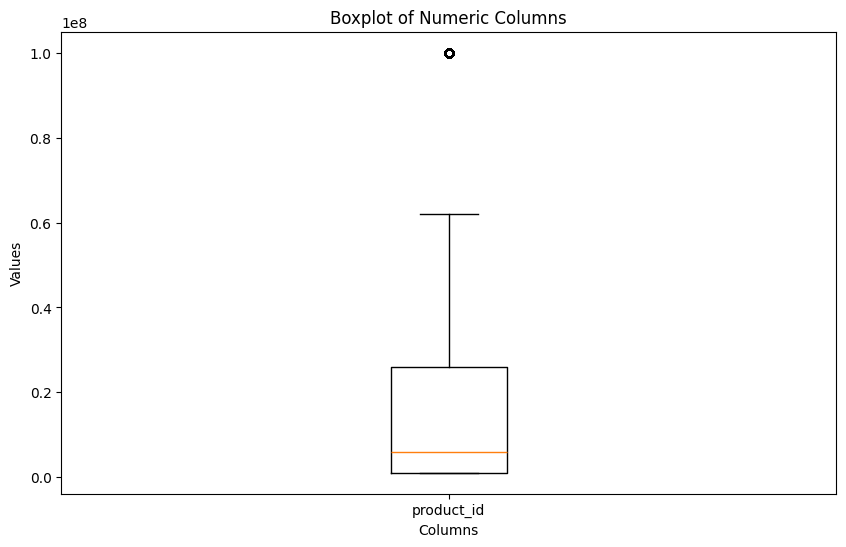

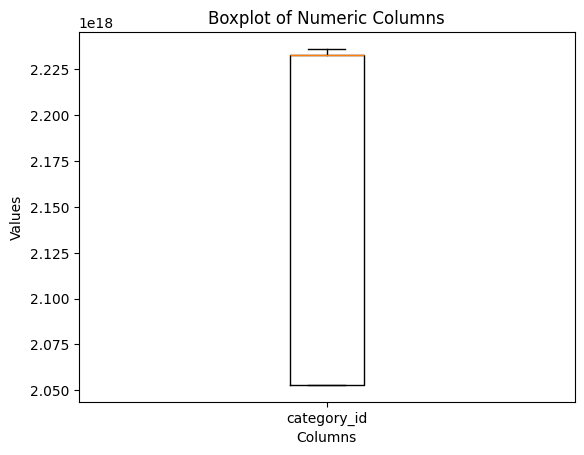

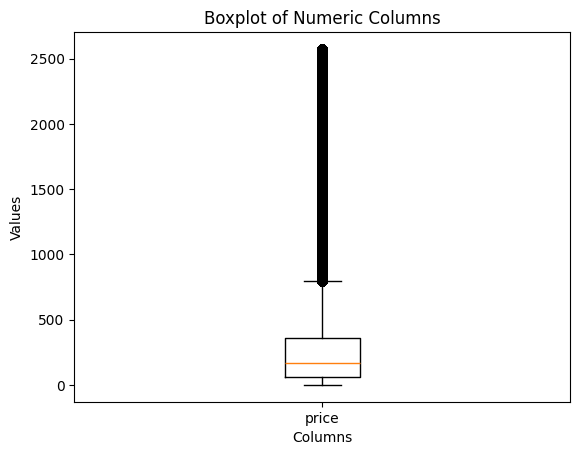

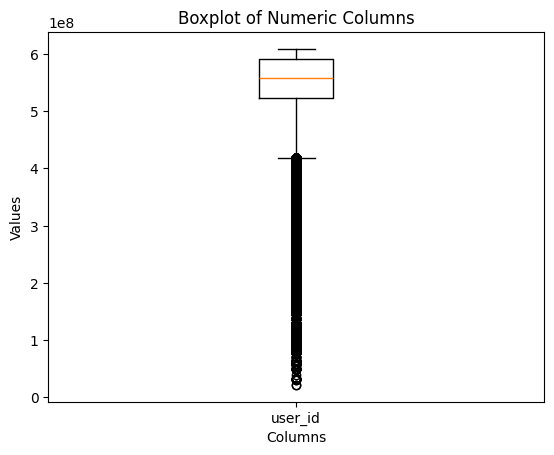

In [65]:
df = pd.DataFrame(data_jan)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()

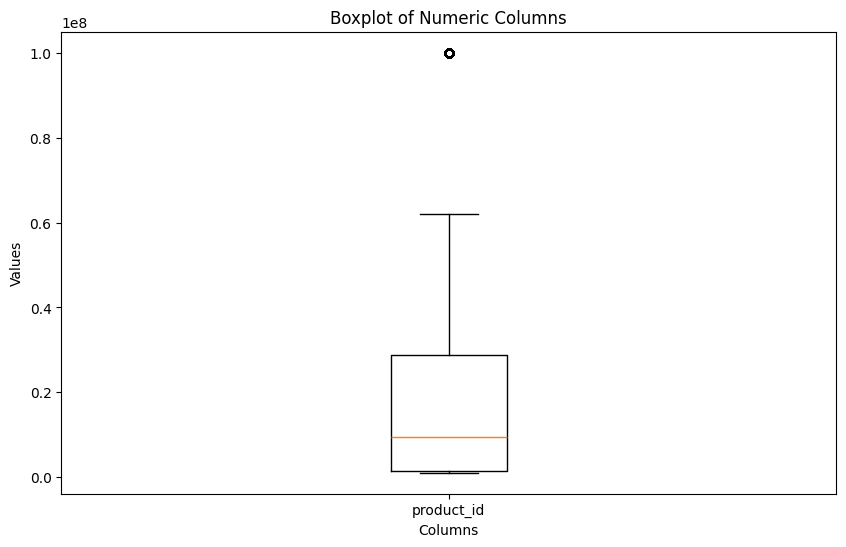

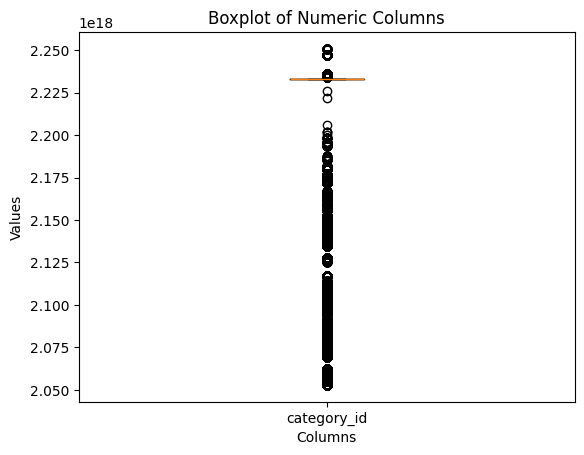

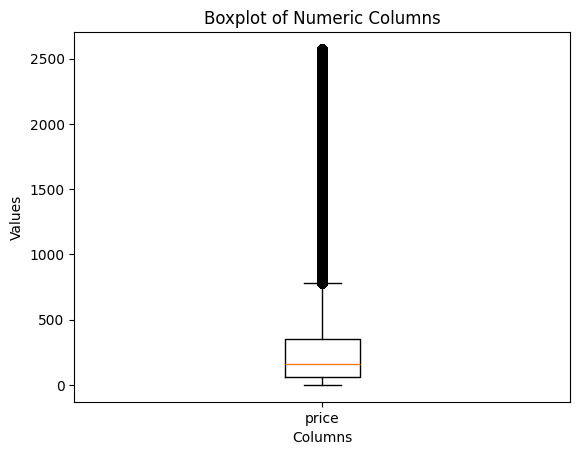

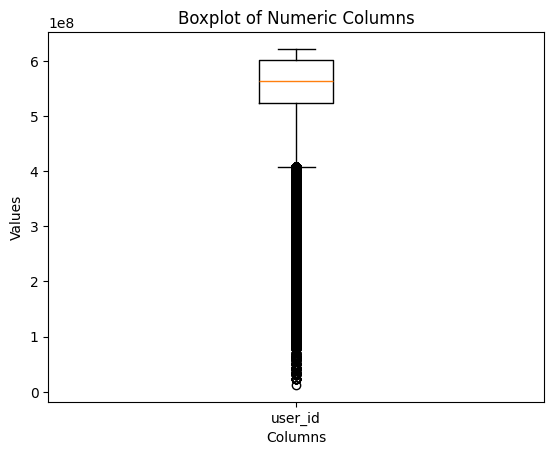

In [66]:
df = pd.DataFrame(data_feb)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()


# there is an outlier in the product_id column

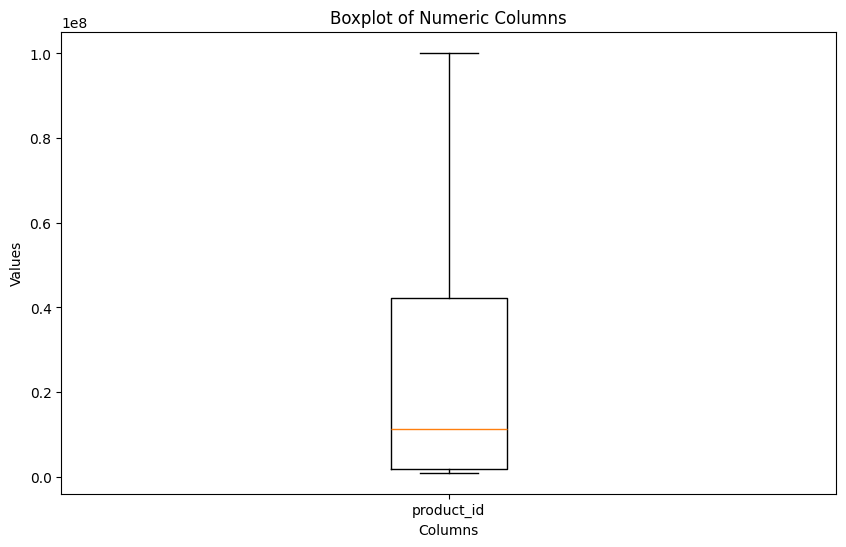

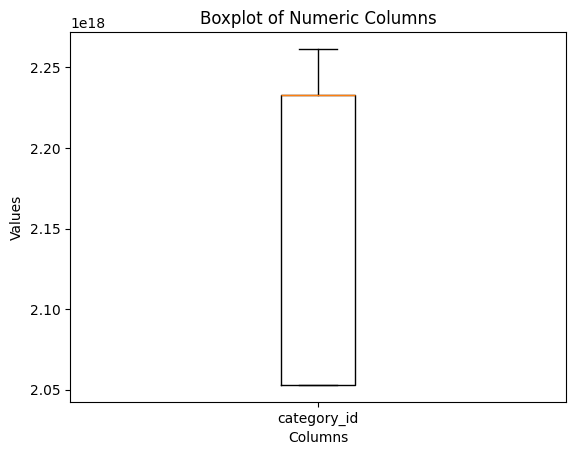

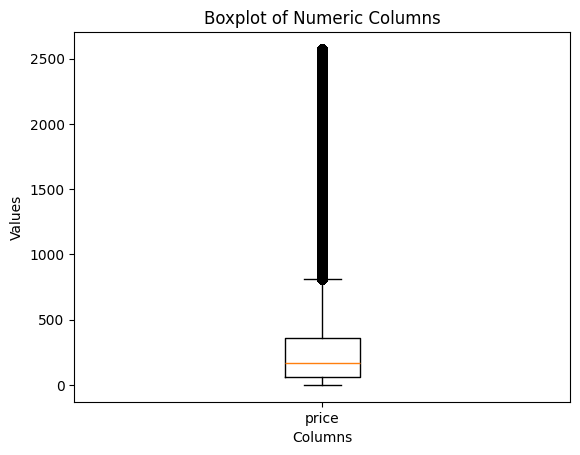

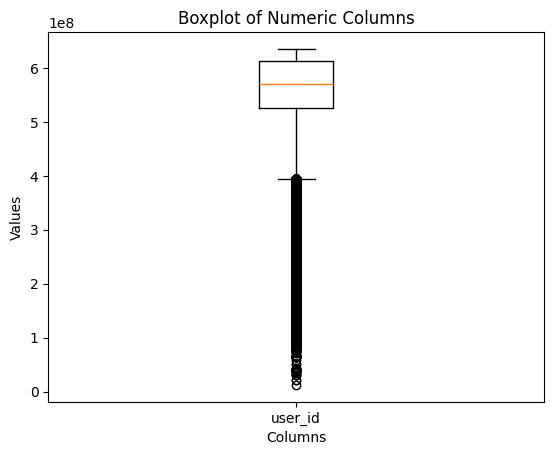

In [67]:
df = pd.DataFrame(data_mar)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()



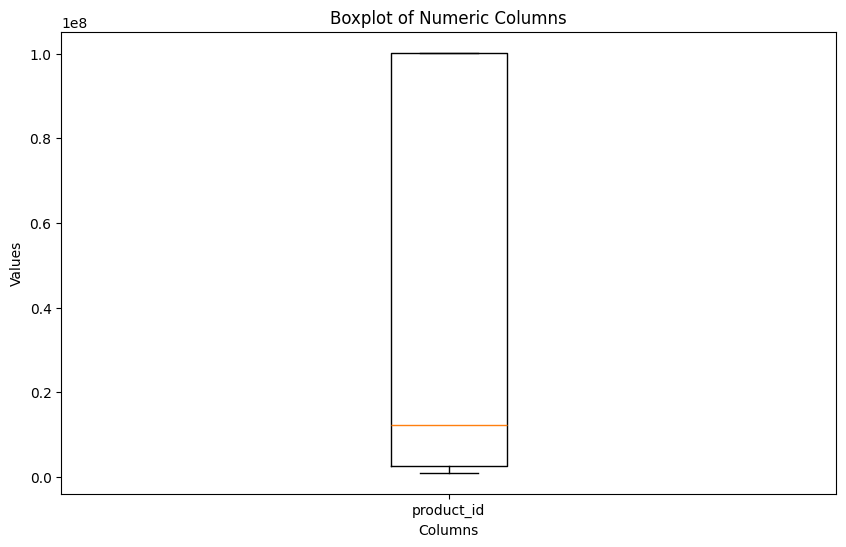

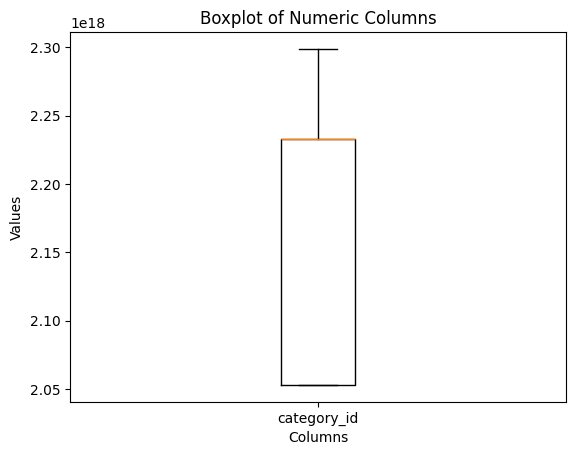

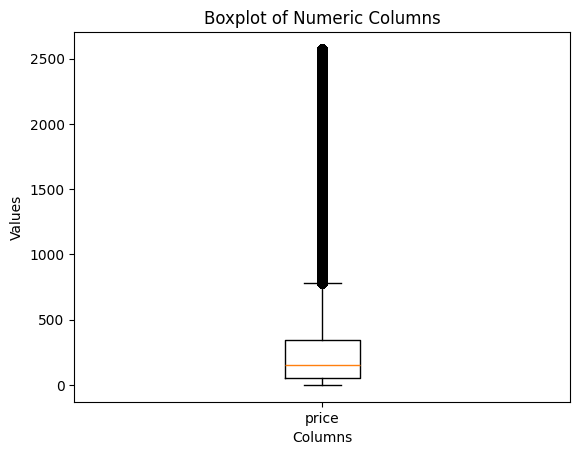

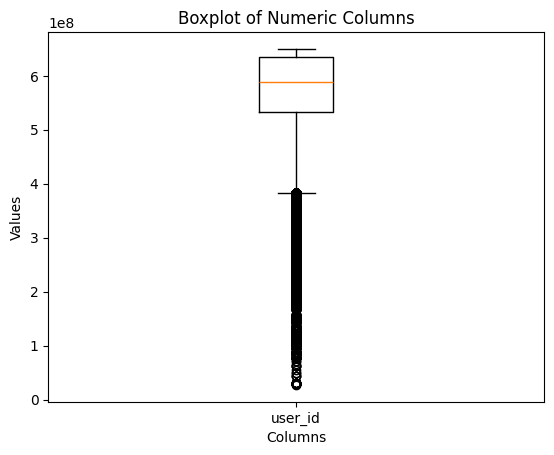

In [68]:
df = pd.DataFrame(data_apr)

# Filter numeric columns (integers or floats)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create boxplot for each numeric column
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.boxplot(df[column], labels=[column])
    plt.title('Boxplot of Numeric Columns')
    plt.ylabel('Values')
    plt.xlabel('Columns')
    plt.xticks(ticks=[1], labels=[column])  # Set column name as x-axis label
    plt.show()

In [69]:
print(data_jan.info())
print(data_feb.info())
print(data_mar.info())
print(data_apr.info())

print(data_jan.isnull().sum())
print(data_feb.isnull().sum())
print(data_mar.isnull().sum())
print(data_apr.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55967041 entries, 0 to 55967040
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318565 entries, 0 to 55318564
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ GB
None
<class 'pandas.core.fr

In [70]:
print(f"Jan Data has {data_jan["category_code"].value_counts().sum()} rows, in which {data_jan["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_jan["category_code"].value_counts().sum() - data_jan["category_code"].isnull().sum()} rows or {((data_jan["category_code"].value_counts().sum() - data_jan["category_code"].isnull().sum())/data_jan["category_code"].value_counts().sum())*100}% of the data")
print(f"Feb Data has {data_feb["category_code"].value_counts().sum()} rows, in which {data_feb["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_feb["category_code"].value_counts().sum() - data_feb["category_code"].isnull().sum()} rows or {((data_feb["category_code"].value_counts().sum() - data_feb["category_code"].isnull().sum())/data_feb["category_code"].value_counts().sum())*100}% of the data")
print(f"Mar Data has {data_mar["category_code"].value_counts().sum()} rows, in which {data_mar["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_mar["category_code"].value_counts().sum() - data_mar["category_code"].isnull().sum()} rows or {((data_mar["category_code"].value_counts().sum() - data_mar["category_code"].isnull().sum())/data_mar["category_code"].value_counts().sum())*100}% of the data")
print(f"Apr Data has {data_apr["category_code"].value_counts().sum()} rows, in which {data_apr["category_code"].isnull().sum()} of the data is null. Which means the non null data is {data_apr["category_code"].value_counts().sum() - data_apr["category_code"].isnull().sum()} rows or {((data_apr["category_code"].value_counts().sum() - data_apr["category_code"].isnull().sum())/data_apr["category_code"].value_counts().sum())*100}% of the data")

Jan Data has 50922151 rows, in which 5044890 of the data is null. Which means the non null data is 45877261 rows or 90.09293617624283% of the data
Feb Data has 50388885 rows, in which 4929680 of the data is null. Which means the non null data is 45459205 rows or 90.21673132874443% of the data
Mar Data has 50402549 rows, in which 5938692 of the data is null. Which means the non null data is 44463857 rows or 88.21747685816446% of the data
Apr Data has 59833395 rows, in which 6755873 of the data is null. Which means the non null data is 53077522 rows or 88.70885899086957% of the data


In [71]:
data_jan["event_time"] = pd.to_datetime(data_jan["event_time"])
data_feb["event_time"] = pd.to_datetime(data_feb["event_time"])
data_mar["event_time"] = pd.to_datetime(data_mar["event_time"])
data_apr["event_time"] = pd.to_datetime(data_apr["event_time"])

data_jan["event_type"] = data_jan["event_type"].astype('category')
data_feb["event_type"] = data_feb["event_type"].astype('category')	
data_mar["event_type"] = data_mar["event_type"].astype('category')
data_apr["event_type"] = data_apr["event_type"].astype('category')

data_jan["category_code"] = data_jan["category_code"].astype('category')
data_feb["category_code"] = data_feb["category_code"].astype('category')
data_mar["category_code"] = data_mar["category_code"].astype('category')
data_apr["category_code"] = data_apr["category_code"].astype('category')



print(data_feb.info())
print(data_mar.info())
print(data_apr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318565 entries, 0 to 55318564
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  category           
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 3.0+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56341241 entries, 0 to 56341240
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     category           
 2   product_id     int64              
 3   category_id    int64   

In [72]:
print(data_jan.describe())
print(data_feb.describe())
print(data_mar.describe())
print(data_apr.describe())

# Ratio of event types
print(data_jan["event_type"].value_counts(normalize=True))
print(data_feb["event_type"].value_counts(normalize=True))	
print(data_mar["event_type"].value_counts(normalize=True))
print(data_apr["event_type"].value_counts(normalize=True))

# Ratio of category codes
print(data_jan["category_code"].value_counts(normalize=True))
print(data_feb["category_code"].value_counts(normalize=True))
print(data_mar["category_code"].value_counts(normalize=True))
print(data_apr["category_code"].value_counts(normalize=True))

         product_id   category_id         price       user_id
count  5.596704e+07  5.596704e+07  5.596704e+07  5.596704e+07
mean   2.151198e+07  2.184718e+18  2.910910e+02  5.574821e+08
std    3.220376e+07  7.928687e+16  3.602194e+02  3.375474e+07
min    1.000544e+06  2.053014e+18  0.000000e+00  2.216536e+07
25%    1.005239e+06  2.053014e+18  6.433000e+01  5.220846e+08
50%    5.800192e+06  2.232732e+18  1.667300e+02  5.582599e+08
75%    2.580000e+07  2.232732e+18  3.575400e+02  5.915309e+08
max    1.000996e+08  2.236178e+18  2.574070e+03  6.088222e+08
         product_id   category_id         price       user_id
count  5.531856e+07  5.531856e+07  5.531856e+07  5.531856e+07
mean   2.738181e+07  2.188589e+18  2.877152e+02  5.633426e+08
std    3.685243e+07  7.731789e+16  3.582074e+02  3.828326e+07
min    1.000365e+06  2.053014e+18  0.000000e+00  1.251152e+07
25%    1.307546e+06  2.232732e+18  6.178000e+01  5.235147e+08
50%    9.300067e+06  2.232732e+18  1.639800e+02  5.637833e+08
75%    2

In [73]:
(data_feb["event_type"] == "purchase").sum()


1200288

In [74]:
print(data_feb.groupby("event_type").describe())

C:\Users\vae.tiolamon\AppData\Local\Temp\ipykernel_23816\1432064459.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_feb.groupby("event_type").describe())


            product_id                                                    \
                 count          mean           std        min        25%   
event_type                                                                 
cart         2885608.0  1.761852e+07  3.092900e+07  1000978.0  1005115.0   
purchase     1200288.0  1.796980e+07  3.245663e+07  1001588.0  1005101.0   
view        51232669.0  2.815221e+07  3.714587e+07  1000365.0  1701462.0   

                                                category_id                \
                   50%         75%          max       count          mean   
event_type                                                                  
cart         4100346.0  15901419.0  100144608.0   2885608.0  2.201706e+18   
purchase     2601780.0  15200181.0  100144443.0   1200288.0  2.206952e+18   
view        10504485.0  28722139.0  100144758.0  51232669.0  2.187420e+18   

            ...   price              user_id                              \
    

# CLEAN THE DATA

In [75]:
df_jan = pd.DataFrame(data_jan)
df_feb = pd.DataFrame(data_feb)
df_mar = pd.DataFrame(data_mar)
df_apr = pd.DataFrame(data_apr)

print(df_jan.head())
print(df_feb.head())
print(df_mar.head())
print(df_apr.head())

                 event_time event_type  product_id          category_id  \
0 2020-01-01 00:00:00+00:00       view     1005073  2232732093077520756   
1 2020-01-01 00:00:01+00:00       view     1005192  2232732093077520756   
2 2020-01-01 00:00:01+00:00       view   100063693  2053013552427434207   
3 2020-01-01 00:00:01+00:00       view     5100816  2232732103831716449   
4 2020-01-01 00:00:02+00:00       view   100014325  2232732103294845523   

              category_code    brand    price    user_id  \
0  construction.tools.light  samsung  1130.02  519698804   
1  construction.tools.light    meizu   205.67  527767423   
2             apparel.shirt   turtle   136.43  519046195   
3             apparel.shoes   xiaomi    29.95  518269232   
4    apparel.shoes.step_ins    intel   167.20  587748686   

                           user_session  
0  69b5d72f-fd6e-4fed-aa23-1286b2ca89a0  
1  7f596032-ccbf-4643-9bad-e36a209512b4  
2  d1e2f343-84bb-49bd-b13d-ca0f1ed9910e  
3  0444841c-38ef-410

## remove unwanted data

we decided to remove the view from the column event_type because the data is very large and we don't need them for answering our business questions

In [76]:
df_jan = df_jan[df_jan['event_type'] != 'view']
df_feb = df_feb[df_feb['event_type'] != 'view']
df_mar = df_mar[df_mar['event_type'] != 'view']
df_apr = df_apr[df_apr['event_type'] != 'view']

splitting the category_code to 2 columns; main_category and secondary_category so that we could group by more specific things, like whether we need to focus on the bigger or smaller product category.

In [77]:
# Assuming df is your DataFrame
df_jan['main_category'] = df_jan['category_code'].str.split('.').str[0]
df_jan['secondary_category'] = df_jan['category_code'].str.split('.').str[1]

# If there are cases where the column doesn't contain '.', you can handle that by adding default values
df_jan['secondary_category'].fillna('N/A', inplace=True)

# Print the modified DataFrame
print(df_jan.head())

                   event_time event_type  product_id          category_id  \
36  2020-01-01 00:00:10+00:00       cart     1005124  2232732093077520756   
41  2020-01-01 00:00:11+00:00       cart     1201565  2232732101407408685   
75  2020-01-01 00:00:22+00:00       cart    13101067  2232732106860003995   
91  2020-01-01 00:00:26+00:00       cart     4801028  2232732079706079299   
123 2020-01-01 00:00:36+00:00       cart     1004226  2232732093077520756   

                category_code   brand    price    user_id  \
36   construction.tools.light   apple  1453.18  532239316   
41      apparel.shoes.slipons   apple   385.34  581430108   
75                        NaN    skad   266.67  519373619   
91              sport.bicycle  xiaomi    14.95  574723072   
123  construction.tools.light   apple   890.11  518285678   

                             user_session main_category secondary_category  
36   253616df-2b1e-4bdf-8a0a-2d1aeef79734  construction              tools  
41   7d7687c4-b6

In [78]:
# Assuming df is your DataFrame
df_feb['main_category'] = df_feb['category_code'].str.split('.').str[0]
df_feb['secondary_category'] = df_feb['category_code'].str.split('.').str[1]

# If there are cases where the column doesn't contain '.', you can handle that by adding default values
df_feb['secondary_category'].fillna('N/A', inplace=True)

# Print the modified DataFrame
print(df_feb.head())

                  event_time event_type  product_id          category_id  \
16 2020-02-01 00:00:06+00:00       cart     1005100  2232732093077520756   
21 2020-02-01 00:00:07+00:00       cart   100001549  2053013558978937451   
60 2020-02-01 00:00:18+00:00       cart   100065078  2232732093077520756   
62 2020-02-01 00:00:18+00:00       cart     5701246  2053013554415534427   
97 2020-02-01 00:00:31+00:00       cart    14701533  2053013552570040549   

                  category_code    brand   price    user_id  \
16     construction.tools.light  samsung  140.28  608822162   
21                sport.bicycle     puma   38.15  608821784   
60     construction.tools.light   xiaomi  568.61  526615078   
62         electronics.video.tv      NaN   24.43  563902689   
97  electronics.video.projector      NaN  154.42  520953435   

                            user_session main_category secondary_category  
16  8062ce43-662e-4b68-a37f-dabee5a8b7f0  construction              tools  
21  600f4508

In [79]:
# Assuming df is your DataFrame
df_mar['main_category'] = df_mar['category_code'].str.split('.').str[0]
df_mar['secondary_category'] = df_mar['category_code'].str.split('.').str[1]

# If there are cases where the column doesn't contain '.', you can handle that by adding default values
df_mar['secondary_category'].fillna('N/A', inplace=True)

# Print the modified DataFrame
print(df_mar.head())

                   event_time event_type  product_id          category_id  \
7   2020-03-01 00:00:07+00:00   purchase     5100722  2232732103101907535   
71  2020-03-01 00:00:42+00:00   purchase   100082062  2232732102103663163   
117 2020-03-01 00:00:59+00:00       cart     6902464  2232732078733000751   
155 2020-03-01 00:01:11+00:00   purchase     5100610  2232732103101907535   
168 2020-03-01 00:01:20+00:00       cart     1002544  2232732093077520756   

                 category_code   brand   price    user_id  \
7           electronics.clocks  huawei  128.68  604860058   
71   furniture.bedroom.blanket     arg   48.88  601908129   
117      electronics.telephone  zlatek   49.91  531574188   
155         electronics.clocks   apple  295.73  613253847   
168   construction.tools.light   apple  397.10  622090790   

                             user_session main_category secondary_category  
7    f558a7d7-f1e4-4b81-8799-9131a81e551b   electronics             clocks  
71   37473d3f-b6

In [80]:
# Assuming df is your DataFrame
df_apr['main_category'] = df_apr['category_code'].str.split('.').str[0]
df_apr['secondary_category'] = df_apr['category_code'].str.split('.').str[1]

# If there are cases where the column doesn't contain '.', you can handle that by adding default values
df_apr['secondary_category'].fillna('N/A', inplace=True)

# Print the modified DataFrame
print(df_apr.head())

                  event_time event_type  product_id          category_id  \
40 2020-04-01 00:00:19+00:00       cart     5100328  2232732103101907535   
52 2020-04-01 00:00:23+00:00       cart   100177859  2053013551932506308   
53 2020-04-01 00:00:23+00:00       cart    22700202  2232732091643068746   
59 2020-04-01 00:00:25+00:00       cart     5100328  2232732103101907535   
70 2020-04-01 00:00:30+00:00       cart     5100328  2232732103101907535   

               category_code     brand   price    user_id  \
40        electronics.clocks    xiaomi  117.12  635164513   
52  construction.tools.drill  s.oliver   60.49  633281427   
53                       NaN     stels  171.18  515979190   
59        electronics.clocks    xiaomi  117.12  635164513   
70        electronics.clocks    xiaomi  117.12  635164513   

                            user_session main_category secondary_category  
40  c40d1b96-90aa-4cee-b9aa-9475d9c4f17f   electronics             clocks  
52  667a8535-221c-4169-a

In [81]:
df_jan.drop('category_code', axis=1, inplace=True)
df_feb.drop('category_code', axis=1, inplace=True)
df_mar.drop('category_code', axis=1, inplace=True)
df_apr.drop('category_code', axis=1, inplace=True)


In [82]:
print(df_jan.head())
print(df_feb.head())
print(df_mar.head())
print(df_apr.head())

                   event_time event_type  product_id          category_id  \
36  2020-01-01 00:00:10+00:00       cart     1005124  2232732093077520756   
41  2020-01-01 00:00:11+00:00       cart     1201565  2232732101407408685   
75  2020-01-01 00:00:22+00:00       cart    13101067  2232732106860003995   
91  2020-01-01 00:00:26+00:00       cart     4801028  2232732079706079299   
123 2020-01-01 00:00:36+00:00       cart     1004226  2232732093077520756   

      brand    price    user_id                          user_session  \
36    apple  1453.18  532239316  253616df-2b1e-4bdf-8a0a-2d1aeef79734   
41    apple   385.34  581430108  7d7687c4-b613-4467-8a81-54c7600e0ca9   
75     skad   266.67  519373619  e97a30d7-2873-4018-9577-8cbf39b1c2c7   
91   xiaomi    14.95  574723072  2f967c6e-b6c4-4971-8599-d34f86570e29   
123   apple   890.11  518285678  7dad15db-dd6d-4e59-a6c7-674612f40837   

    main_category secondary_category  
36   construction              tools  
41        apparel   

In [83]:
# Concatenate the DataFrames vertically
combined_df = pd.concat([df_jan, df_feb, df_mar, df_apr], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

                        event_time event_type  product_id  \
0        2020-01-01 00:00:10+00:00       cart     1005124   
1        2020-01-01 00:00:11+00:00       cart     1201565   
2        2020-01-01 00:00:22+00:00       cart    13101067   
3        2020-01-01 00:00:26+00:00       cart     4801028   
4        2020-01-01 00:00:36+00:00       cart     1004226   
...                            ...        ...         ...   
15790837 2020-04-30 23:59:32+00:00   purchase     4802161   
15790838 2020-04-30 23:59:36+00:00   purchase   100143638   
15790839 2020-04-30 23:59:43+00:00       cart   100068441   
15790840 2020-04-30 23:59:49+00:00       cart     3700621   
15790841 2020-04-30 23:59:55+00:00       cart     2700800   

                  category_id    brand    price    user_id  \
0         2232732093077520756    apple  1453.18  532239316   
1         2232732101407408685    apple   385.34  581430108   
2         2232732106860003995     skad   266.67  519373619   
3         223273207

We are droping the user_id, product_id, and category_id because we don't need this column in our project and it may take up some storage space. In the next chunk, you can see that the user_id, product_id, and category_id columns take up how much storage.


In [84]:
# Assuming your DataFrame is named 'df'
size_before = combined_df.memory_usage(deep=True).sum()
df_dropped = combined_df.drop(columns=['user_id', "product_id", "category_id"])
df_dropped = df_dropped.dropna(subset=["user_session", "main_category", "secondary_category"])
size_after = df_dropped.memory_usage(deep=True).sum()
print("Size before dropping: {:,}".format(size_before))
print("Size after dropping: {:,}".format(size_after))
percentage_savings = ((size_before - size_after) / size_before) * 100
print("Percentage of memory saved: {:.2f}%".format(percentage_savings))

Size before dropping: 4,589,786,167
Size after dropping: 4,014,240,200
Percentage of memory saved: 12.54%


In [85]:
combined_df = df_dropped

combined_df.head()

,event_time,event_type,brand,price,user_session,main_category,secondary_category
0,2020-01-01 00:00:10+00:00,cart,apple,1453.18,253616df-2b1e-4bdf-8a0a-2d1aeef79734,construction,tools
1,2020-01-01 00:00:11+00:00,cart,apple,385.34,7d7687c4-b613-4467-8a81-54c7600e0ca9,apparel,shoes
3,2020-01-01 00:00:26+00:00,cart,xiaomi,14.95,2f967c6e-b6c4-4971-8599-d34f86570e29,sport,bicycle
4,2020-01-01 00:00:36+00:00,cart,apple,890.11,7dad15db-dd6d-4e59-a6c7-674612f40837,construction,tools
5,2020-01-01 00:00:44+00:00,cart,apple,869.46,2a5143e3-2de9-4dc0-8bbd-8f431fa8fc19,construction,tools


In this case, since we don't have the product name, only the product id, what we do is drop the NaN. But in real world, we wouldn't delete in, and instead we bind it with the product name in another database and make a machine learning classification to determine which categories the product goes.

The reason why we drop user_session NaN is because there aren't a lot of NaN there, and since we need the column, we cannot drop the whole column nor replace it with a random id because we are not sure if the missing values may be the same person.

In [91]:
combined_df.tail()

,event_time,event_type,brand,price,user_session,main_category,secondary_category
15790837,2020-04-30 23:59:32+00:00,purchase,jbl,10.53,a48325b5-a58c-4016-a876-8fe6c9b7dfec,sport,bicycle
15790838,2020-04-30 23:59:36+00:00,purchase,samsung,353.77,9b370ac6-6655-40c4-90f0-e5d6917b8959,construction,tools
15790839,2020-04-30 23:59:43+00:00,cart,samsung,276.00,b756712f-b37b-4502-8c0b-ea4f1bbe335d,construction,tools
15790840,2020-04-30 23:59:49+00:00,cart,vitek,115.81,9a495abd-8b2f-4c1d-9e38-88ae5612068b,appliances,environment
15790841,2020-04-30 23:59:55+00:00,cart,NaN,268.49,fde0f6de-116c-4674-92c2-7c579dff3167,appliances,kitchen


In [87]:
len(combined_df)

14473670

In [96]:
unique_categories = combined_df["event_type"].unique()

print(unique_categories)

['cart', 'purchase']
Categories (3, object): ['cart', 'purchase', 'view']


# ANALYZE THE DATA

In [102]:
# Group by user_session and count the number of purchases
purchase_counts_per_session = combined_df[combined_df['event_type'] == 'purchase'].groupby('user_session').size()

# Calculate the average number of purchases per user_session
average_purchase_per_session = purchase_counts_per_session.mean()

# Print the average number of purchases per user_session
print("Average number of purchases per user_session:", average_purchase_per_session)

Average number of purchases per user_session: 1.3098156705499184


In [107]:
# Filter for 'cart' actions and count unique sub-categories per user_session
cart_data = combined_df[combined_df['event_type'] == 'cart']
unique_subcategories_per_session = cart_data.groupby('user_session')['secondary_category'].nunique()

# Calculate the average number of unique sub-categories per user_session
average_unique_subcategories_per_session = unique_subcategories_per_session.mean()

# Display the average number of unique sub-categories per user_session
print("Average number of unique sub-categories added to cart per user_session:", average_unique_subcategories_per_session)

Average number of unique sub-categories added to cart per user_session: 1.0402838928728153


In [109]:
# Calculate the number of cart additions and purchases per user_session & secondary_category columns
cart_counts = combined_df[combined_df['event_type'] == 'cart'].groupby(['user_session']).size()
purchase_counts = combined_df[combined_df['event_type'] == 'purchase'].groupby(['user_session']).size()

# Calculate the average number of cart additions and purchases per user_session & secondary_category columns
avg_cart_per_session = cart_counts.mean()
avg_purchase_per_session = purchase_counts.mean()

# Calculate the ratio between average cart additions and purchases
ratio = avg_cart_per_session / avg_purchase_per_session

# Print the conclusion
print("One person per User Session would add {:.5f} products to the cart before purchasing them."
      .format(ratio.mean()))

One person per User Session would add 1.35620 products to the cart before purchasing them.


In [108]:
# Calculate the number of cart additions and purchases per user_session & secondary_category columns
cart_counts = combined_df[combined_df['event_type'] == 'cart'].groupby(['user_session', 'secondary_category']).size()
purchase_counts = combined_df[combined_df['event_type'] == 'purchase'].groupby(['user_session', 'secondary_category']).size()

# Calculate the average number of cart additions and purchases per user_session & secondary_category columns
avg_cart_per_session = cart_counts.mean()
avg_purchase_per_session = purchase_counts.mean()

# Calculate the ratio between average cart additions and purchases
ratio = avg_cart_per_session / avg_purchase_per_session

# Print the conclusion
print("One person per User Session with the same product category would add {:.5f} products to the cart before purchasing them."
      .format(ratio.mean()))

One person per User Session with one Secondary Category would add 1.36161 products to the cart before purchasing them.


From the chunks above, we could conclude that:
1. One person would purchase an average of 1.310 products per User Session
2. One person would purchase an average of 1.040 different product category per User Session
3. One person would add an average of 1.356 product with the same product category per User Session
4. One person would add an average of 1.362 product with the same product category per User Session

The data can be used for businesses strategies, for example how many ads they would need to purchase in the ecommerce. 

# SAVE THE DATA TO CSV TO BE LOADED IN THE BUCKET FOR THE NEXT STEP

In [89]:
#combined_df.to_csv("cleaned_ecommerce.csv", index=False)

In [90]:
# from pyspark.sql import SparkSession

# # Assuming your cleaned data is stored in a dictionary
# cleaned_data = {
#     "col1": [1, 2, 3],
#     "col2": ["A", "B", "C"]
# }

# # Create a SparkSession
# spark = SparkSession.builder.appName("Example").getOrCreate()

# # Convert dictionary to DataFrame
# cleaned_data_df = spark.createDataFrame([(k, v) for k, v in cleaned_data.items()], ["col_name", "col_data"])

# # Save DataFrame to MinIO bucket as CSV
# minio_endpoint = "http://localhost:9001/browser/ecommerce"  # Replace with your MinIO endpoint

# cleaned_data_df.write.format("csv") \
#     .option("header", "true") \
#     .mode("overwrite") \
#     .save(f"s3a://{minio_endpoint}/{bucket_name}/cleaned_data.csv")
